# import

In [30]:
from __future__ import absolute_import, print_function, division

from matplotlib import dates as mpl_dates
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
import matplotlib
from matplotlib import pyplot
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib import rcParams
from matplotlib.patches import Circle, Rectangle, Ellipse, Polygon, FancyArrow
from matplotlib.collections import PatchCollection, LineCollection


import datetime
from collections import OrderedDict


from astropy.io.fits import getheader
from astropy.io.fits import getdata
from astropy.utils.data import get_pkg_data_filename
import aplpy
from astropy import log
from astropy.io import fits
import astropy.coordinates as coord
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.table import Table
from astropy.wcs import WCS
from astropy import constants as const
from astropy.constants import k_B



import time
import math
import os,sys
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "svg"
from matplotlib import rcParams
#rcParams["savefig.dpi"] = 300 #%matplotlib inline

## cosmo

In [50]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [2]:
#!/usr/bin/env python
import os
import numpy as np
import pandas as pd
from glob import glob
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from qsofitmore import QSOFitNew
import qsofitmore

mkdir output

mkdir data

mv /Users/lyubing/Downloads/spec-1075-52933-0140.fits ./data/

In [10]:
ls data

spec-1075-52933-0140.fits


In [3]:
path = "./output/"

## SDSS

In [4]:
import numpy as np
import os
from astropy.io import fits
path='./output/'
path_ex='./output/'

In [5]:
newdata = np.rec.array([(6564.61,'Ha',6400.,6800.,'Ha_br',3,5e-3,0.004,0.017,0.015,0,0,0,0.05),\
                        (6564.61,'Ha',6400.,6800.,'Ha_na',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (6549.85,'Ha',6400.,6800.,'NII6549',1,1e-3,2.3e-4,0.0017,5e-3,1,1,1,0.001),\
                        (6585.28,'Ha',6400.,6800.,'NII6585',1,1e-3,2.3e-4,0.0017,5e-3,1,1,1,0.003),\
                        (6718.29,'Ha',6400.,6800.,'SII6718',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        (6732.67,'Ha',6400.,6800.,'SII6732',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        
                        (4862.68,'Hb',4640.,5100.,'Hb_br',3,5e-3,0.004,0.022,0.01,0,0,0,0.01),\
                        (4862.68,'Hb',4640.,5100.,'Hb_na',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (4960.30,'Hb',4640.,5100.,'OIII4959',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (5008.24,'Hb',4640.,5100.,'OIII5007',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.004),\
                        (4955.30,'Hb',4640.,5100.,'OIII4959w',1,1e-3,2.3e-4,0.0017,0.01,2,2,0,0.001),\
                        (4995.24,'Hb',4640.,5100.,'OIII5007w',1,1e-3,2.3e-4,0.0017,0.01,2,2,0,0.002),\
                        # (4687.02,'Hb',4640.,5100.,'HeII4687_br',1,5e-3,0.004,0.05,0.005,0,0,0,0.001),\
                        # (4687.02,'Hb',4640.,5100.,'HeII4687_na',1,1e-3,2.3e-4,0.0017,0.005,1,1,0,0.001),\
                        # (4341.68,'Hg',4250.,4440.,'Hg_br',1,5e-3,0.004,0.025,0.0017,0,0,0,0.05),\
                        # (4341.68,'Hg',4250.,4440.,'Hg_na',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        # (4364.44,'Hg',4250.,4440.,'OIII4364',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        #( 3934.78,'CaII',3900.,3960.,'CaII3934',2,1e-3,3.333e-4,0.0017,0.01,99,0,0,-0.001),\
                        
                        (3728.48,'OII',3650.,3800.,'OII3728',1,1e-3,3.333e-4,0.0017,0.01,1,1,0,0.001),\
                        
                        #(3426.84,'NeV',3380.,3480.,'NeV3426',1,1e-3,3.333e-4,0.0017,0.01,0,0,0,0.001),\
                        #(3426.84,'NeV',3380.,3480.,'NeV3426_br',1,5e-3,0.0025,0.02,0.01,0,0,0,0.001),\
                        
                        (2798.75,'MgII',2700.,2900.,'MgII_br',2,5e-3,0.004,0.015,0.0017,0,0,0,0.05),\
                        (2798.75,'MgII',2700.,2900.,'MgII_na',1,1e-3,2.3e-4,0.0017,0.01,0,0,0,0.002),\
                        
                        
                        (1908.73,'CIII',1700.,1970.,'CIII_br',2,5e-3,0.004,0.015,0.015,99,0,0,0.01),\
                        #(1908.73,'CIII',1700.,1970.,'CIII_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        #(1892.03,'CIII',1700.,1970.,'SiIII1892',1,2e-3,0.001,0.015,0.003,1,1,0,0.005),\
                        #(1857.40,'CIII',1700.,1970.,'AlIII1857',1,2e-3,0.001,0.015,0.003,1,1,0,0.005),\
                        #(1816.98,'CIII',1700.,1970.,'SiII1816',1,2e-3,0.001,0.015,0.01,1,1,0,0.0002),\
                        #(1786.7,'CIII',1700.,1970.,'FeII1787',1,2e-3,0.001,0.015,0.01,1,1,0,0.0002),\
                        #(1750.26,'CIII',1700.,1970.,'NIII1750',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        #(1718.55,'CIII',1700.,1900.,'NIV1718',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        
                        (1549.06,'CIV',1500.,1700.,'CIV_br',3,5e-3,0.004,0.015,0.015,0,0,0,0.05),\
#                        (1549.06,'CIV',1500.,1700.,'CIV_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        #(1640.42,'CIV',1500.,1700.,'HeII1640',1,1e-3,5e-4,0.0017,0.008,1,1,0,0.002),\
                        #(1663.48,'CIV',1500.,1700.,'OIII1663',1,1e-3,5e-4,0.0017,0.008,1,1,0,0.002),\
                        #(1640.42,'CIV',1500.,1700.,'HeII1640_br',1,5e-3,0.0025,0.02,0.008,1,1,0,0.002),\
                        #(1663.48,'CIV',1500.,1700.,'OIII1663_br',1,5e-3,0.0025,0.02,0.008,1,1,0,0.002),\
                        
                        #(1402.06,'SiIV',1290.,1450.,'SiIV_OIV1',1,5e-3,0.002,0.05,0.015,1,1,0,0.05),\
                        #(1396.76,'SiIV',1290.,1450.,'SiIV_OIV2',1,5e-3,0.002,0.05,0.015,1,1,0,0.05),\
                        #(1335.30,'SiIV',1290.,1450.,'CII1335',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        #(1304.35,'SiIV',1290.,1450.,'OI1304',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        
                        # (1215.67,'Lya',1150.,1290.,'Lya_br',3,5e-3,0.004,0.05,0.02,0,0,0,0.05),\
                        # (1215.67,'Lya',1150.,1290.,'Lya_na',1,1e-3,5e-4,0.0017,0.01,0,0,0,0.002),\
                        # (1240.14,'Lya',1150.,1290.,'NV',1,1e-3,5e-4,0.0017,0.01,0,0,0,0.002)\
                        ],\
                     formats='float32,a20,float32,float32,a20,float32,float32,float32,float32,\
                     float32,float32,float32,float32,float32',\
                     names='lambda,compname,minwav,maxwav,linename,ngauss,inisig,minsig,maxsig,voff,vindex,windex,findex,fvalue')
#------header-----------------
hdr = fits.Header()
hdr['lambda'] = 'Vacuum Wavelength in Ang'
hdr['minwav'] = 'Lower complex fitting wavelength range'
hdr['maxwav'] = 'Upper complex fitting wavelength range'
hdr['ngauss'] = 'Number of Gaussians for the line'
hdr['inisig'] = 'Initial guess of linesigma [in lnlambda]'
hdr['minsig'] = 'Lower range of line sigma [lnlambda]'  
hdr['maxsig'] = 'Upper range of line sigma [lnlambda]'
hdr['voff  '] = 'Limits on velocity offset from the central wavelength [lnlambda]'
hdr['vindex'] = 'Entries w/ same NONZERO vindex constrained to have same velocity'
hdr['windex'] = 'Entries w/ same NONZERO windex constrained to have same width'
hdr['findex'] = 'Entries w/ same NONZERO findex have constrained flux ratios'
hdr['fvalue'] = 'Relative scale factor for entries w/ same findex'
#------save line info-----------
hdu = fits.BinTableHDU(data=newdata,header=hdr,name='data')
hdu.writeto(path+'qsopar.fits',overwrite=True)

In [6]:
from astropy.table import Table
tbdata = Table.read(path+"qsopar.fits")
tbdata

lambda,compname,minwav,maxwav,linename,ngauss,inisig,minsig,maxsig,voff,vindex,windex,findex,fvalue
float32,bytes20,float32,float32,bytes20,float32,float32,float32,float32,float32,float32,float32,float32,float32
6564.61,Ha,6400.0,6800.0,Ha_br,3.0,0.005,0.004,0.017,0.015,0.0,0.0,0.0,0.05
6564.61,Ha,6400.0,6800.0,Ha_na,1.0,0.001,0.00023,0.0017,0.01,1.0,1.0,0.0,0.002
6549.85,Ha,6400.0,6800.0,NII6549,1.0,0.001,0.00023,0.0017,0.005,1.0,1.0,1.0,0.001
6585.28,Ha,6400.0,6800.0,NII6585,1.0,0.001,0.00023,0.0017,0.005,1.0,1.0,1.0,0.003
6718.29,Ha,6400.0,6800.0,SII6718,1.0,0.001,0.00023,0.0017,0.005,1.0,1.0,2.0,0.001
6732.67,Ha,6400.0,6800.0,SII6732,1.0,0.001,0.00023,0.0017,0.005,1.0,1.0,2.0,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955.3,Hb,4640.0,5100.0,OIII4959w,1.0,0.001,0.00023,0.0017,0.01,2.0,2.0,0.0,0.001
4995.24,Hb,4640.0,5100.0,OIII5007w,1.0,0.001,0.00023,0.0017,0.01,2.0,2.0,0.0,0.002


### ra dec

In [7]:
ra=29.519793   
dec=-0.872746

In [11]:
class SdssSpec():
    '''
    A simple class to load SDSS spectrum.
    
    '''
    def __init__(self, fname, redshift=None, scale_flux=False):
        """
        Initialize SdssSpec object from a SDSS 1D spectrum file.
        Parameters:
        ----------
            fname : str
                name of the fits file.
            redshift : float
                redshift of the spectrum. Should be provided if not recorded in the fits header.
            scale_flux : bool (`True` or `False`)
                When `True`, the flux and err are multiplied by 1e-17; `False` by default.
        Example:
        ----------
        sp = SdssSpec("spec-plateid-mjd-fiberid.fits", redshift=0.01)
        """
        hdu = fits.open(fname)
        basename = os.path.basename(fname)
        self.basename = basename
        hdr = hdu[0].header
        self.hdr = hdr
        self.ra=hdr['plug_ra']          # RA 
        self.dec=hdr['plug_dec']        # DEC
        self.plateid = hdr['plateid']   # SDSS plate ID
        self.mjd = hdr['mjd']           # SDSS MJD
        self.fiberid = hdr['fiberid']   # SDSS fiber ID
        self.scale_flux = scale_flux
        if redshift is None:
            try: 
                redshift = hdu[2].data['z']
            except: 
                raise ValueError('Redshift not provided. '+ 
                                 'Please check the input parameters carefully.')
        self.redshift = redshift[0]
        data = hdu[1].data
        hdu.close()     
        wave = 10**data['loglam']
        flux = data['flux']
        ivar = pd.Series(data['ivar'])
        ivar.replace(0, np.nan, inplace=True)
        ivar_safe = ivar.interpolate()
        err = 1./np.sqrt(ivar_safe.values)
        if scale_flux == True:
            flux *= 1e-17
            err *= 1e-17
        self.wave = wave
        self.flux = flux
        self.err = err    
        
        
    def plot(self):
        plt.figure()
        plt.plot(self.wave, self.flux)
        plt.xlabel(r'Wavelength [$\mathrm{\AA}$]')
        if self.scale_flux == True:
            plt.ylabel(r'Flux [$\mathrm{erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
        else:
            plt.ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
        plt.title(self.basename)

In [12]:
sp1 = SdssSpec('./data/spec-1075-52933-0140.fits')

In [13]:
sp1.redshift

0.08044073

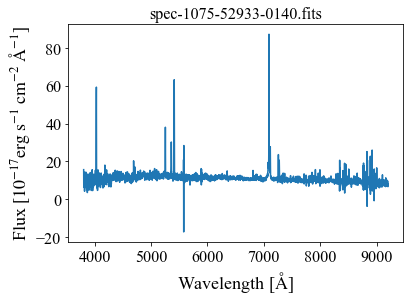

In [14]:
sp1.plot()

In [87]:
q1 = QSOFitNew(lam=sp1.wave, flux=sp1.flux, err=sp1.err, 
              z=sp1.redshift, ra=sp1.ra, dec=sp1.dec,
              name=None, plateid=sp1.plateid, 
              mjd=sp1.mjd, fiberid=sp1.fiberid, 
              path='./output/', is_sdss=True)

Name is now None.
`mapname` for extinction not set.
Setting `mapname` to `sfd`.
['OII3728', 'Hb_na', 'OIII4959', 'OIII5007', 'OIII4959w', 'OIII5007w', 'Ha_na', 'NII6549', 'NII6585', 'SII6718', 'SII6732']


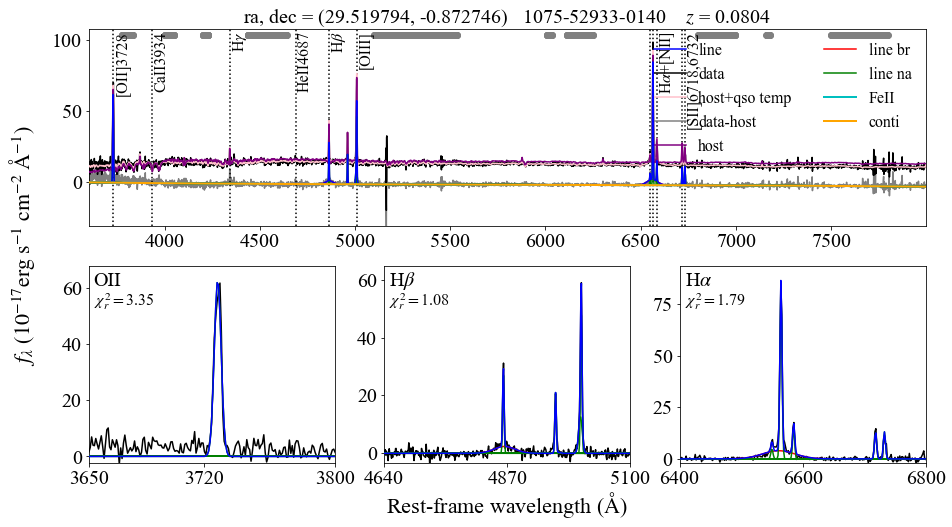

In [88]:
q1.Fit(name=None, nsmooth =1, and_or_mask = False, deredden = True, 
      reject_badpix = False, 
      wave_range = [3600, 8000],
      wave_mask = None, decomposition_host = True, 
      Mi = None, npca_gal = 5, npca_qso = 20,
      Fe_uv_op = True, poly = True, BC = False, 
      rej_abs = False, initial_guess = None, MC = True, 
      n_trails = 20, linefit = True, tie_lambda = True, 
      tie_width = True, tie_flux_1 = True, tie_flux_2 = True,
      save_result = True, plot_fig = True, save_fig = True, 
      plot_line_name = True, plot_legend = True, save_fits_name = None)

In [89]:
q1.result_table

ra,dec,plateid,MJD,fiberid,redshift,SNR_SPEC,SN_ratio_conti,Fe_uv_norm,Fe_uv_norm_err,Fe_uv_FWHM,Fe_uv_FWHM_err,Fe_uv_shift,Fe_uv_shift_err,Fe_op_norm,Fe_op_norm_err,Fe_op_FWHM,Fe_op_FWHM_err,Fe_op_shift,Fe_op_shift_err,PL_norm,PL_norm_err,PL_slope,PL_slope_err,Blamer_norm,Blamer_norm_err,Balmer_Te,Balmer_Te_err,Balmer_Tau,Balmer_Tau_err,POLY_a,POLY_a_err,POLY_b,POLY_b_err,POLY_c,POLY_c_err,L1350,L1350_err,L3000,L3000_err,L5100,L5100_err,LINE_NPIX_OII,OII_line_status,OII_line_min_chi2,OII_line_red_chi2,OII_niter,OII_ndof,LINE_MED_SN_OII,LINE_NPIX_Hb,Hb_line_status,Hb_line_min_chi2,Hb_line_red_chi2,Hb_niter,Hb_ndof,LINE_MED_SN_Hb,LINE_NPIX_Ha,Ha_line_status,Ha_line_min_chi2,Ha_line_red_chi2,Ha_niter,Ha_ndof,LINE_MED_SN_Ha,OII_whole_br_fwhm,OII_whole_br_fwhm_err,OII_whole_br_sigma,OII_whole_br_sigma_err,OII_whole_br_ew,OII_whole_br_ew_err,OII_whole_br_peak,OII_whole_br_peak_err,OII_whole_br_area,OII_whole_br_area_err,Hb_whole_br_fwhm,Hb_whole_br_fwhm_err,Hb_whole_br_sigma,Hb_whole_br_sigma_err,Hb_whole_br_ew,Hb_whole_br_ew_err,Hb_whole_br_peak,Hb_whole_br_peak_err,Hb_whole_br_area,Hb_whole_br_area_err,Ha_whole_br_fwhm,Ha_whole_br_fwhm_err,Ha_whole_br_sigma,Ha_whole_br_sigma_err,Ha_whole_br_ew,Ha_whole_br_ew_err,Ha_whole_br_peak,Ha_whole_br_peak_err,Ha_whole_br_area,Ha_whole_br_area_err,OII3728_fwhm,OII3728_fwhm_err,OII3728_sigma,OII3728_sigma_err,OII3728_ew,OII3728_ew_err,OII3728_peak,OII3728_peak_err,OII3728_area,OII3728_area_err,Hb_na_fwhm,Hb_na_fwhm_err,Hb_na_sigma,Hb_na_sigma_err,Hb_na_ew,Hb_na_ew_err,Hb_na_peak,Hb_na_peak_err,Hb_na_area,Hb_na_area_err,OIII4959_fwhm,OIII4959_fwhm_err,OIII4959_sigma,OIII4959_sigma_err,OIII4959_ew,OIII4959_ew_err,OIII4959_peak,OIII4959_peak_err,OIII4959_area,OIII4959_area_err,OIII5007_fwhm,OIII5007_fwhm_err,OIII5007_sigma,OIII5007_sigma_err,OIII5007_ew,OIII5007_ew_err,OIII5007_peak,OIII5007_peak_err,OIII5007_area,OIII5007_area_err,OIII4959w_fwhm,OIII4959w_fwhm_err,OIII4959w_sigma,OIII4959w_sigma_err,OIII4959w_ew,OIII4959w_ew_err,OIII4959w_peak,OIII4959w_peak_err,OIII4959w_area,OIII4959w_area_err,OIII5007w_fwhm,OIII5007w_fwhm_err,OIII5007w_sigma,OIII5007w_sigma_err,OIII5007w_ew,OIII5007w_ew_err,OIII5007w_peak,OIII5007w_peak_err,OIII5007w_area,OIII5007w_area_err,Ha_na_fwhm,Ha_na_fwhm_err,Ha_na_sigma,Ha_na_sigma_err,Ha_na_ew,Ha_na_ew_err,Ha_na_peak,Ha_na_peak_err,Ha_na_area,Ha_na_area_err,NII6549_fwhm,NII6549_fwhm_err,NII6549_sigma,NII6549_sigma_err,NII6549_ew,NII6549_ew_err,NII6549_peak,NII6549_peak_err,NII6549_area,NII6549_area_err,NII6585_fwhm,NII6585_fwhm_err,NII6585_sigma,NII6585_sigma_err,NII6585_ew,NII6585_ew_err,NII6585_peak,NII6585_peak_err,NII6585_area,NII6585_area_err,SII6718_fwhm,SII6718_fwhm_err,SII6718_sigma,SII6718_sigma_err,SII6718_ew,SII6718_ew_err,SII6718_peak,SII6718_peak_err,SII6718_area,SII6718_area_err,SII6732_fwhm,SII6732_fwhm_err,SII6732_sigma,SII6732_sigma_err,SII6732_ew,SII6732_ew_err,SII6732_peak,SII6732_peak_err,SII6732_area,SII6732_area_err,OIII4959_whole_fwhm,OIII4959_whole_fwhm_err,OIII4959_whole_sigma,OIII4959_whole_sigma_err,OIII4959_whole_ew,OIII4959_whole_ew_err,OIII4959_whole_peak,OIII4959_whole_peak_err,OIII4959_whole_area,OIII4959_whole_area_err,OIII5007_whole_fwhm,OIII5007_whole_fwhm_err,OIII5007_whole_sigma,OIII5007_whole_sigma_err,OIII5007_whole_ew,OIII5007_whole_ew_err,OIII5007_whole_peak,OIII5007_whole_peak_err,OIII5007_whole_area,OIII5007_whole_area_err
float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,f

In [90]:
tb = Table.read('./output/1075-52933-0140.fits')
tb

ra,dec,plateid,MJD,fiberid,redshift,SNR_SPEC,SN_ratio_conti,Fe_uv_norm,Fe_uv_norm_err,Fe_uv_FWHM,Fe_uv_FWHM_err,Fe_uv_shift,Fe_uv_shift_err,Fe_op_norm,Fe_op_norm_err,Fe_op_FWHM,Fe_op_FWHM_err,Fe_op_shift,Fe_op_shift_err,PL_norm,PL_norm_err,PL_slope,PL_slope_err,Blamer_norm,Blamer_norm_err,Balmer_Te,Balmer_Te_err,Balmer_Tau,Balmer_Tau_err,POLY_a,POLY_a_err,POLY_b,POLY_b_err,POLY_c,POLY_c_err,L1350,L1350_err,L3000,L3000_err,L5100,L5100_err,LINE_NPIX_OII,OII_line_status,OII_line_min_chi2,OII_line_red_chi2,OII_niter,OII_ndof,LINE_MED_SN_OII,LINE_NPIX_Hb,Hb_line_status,Hb_line_min_chi2,Hb_line_red_chi2,Hb_niter,Hb_ndof,LINE_MED_SN_Hb,LINE_NPIX_Ha,Ha_line_status,Ha_line_min_chi2,Ha_line_red_chi2,Ha_niter,Ha_ndof,LINE_MED_SN_Ha,OII_whole_br_fwhm,OII_whole_br_fwhm_err,OII_whole_br_sigma,OII_whole_br_sigma_err,OII_whole_br_ew,OII_whole_br_ew_err,OII_whole_br_peak,OII_whole_br_peak_err,OII_whole_br_area,OII_whole_br_area_err,Hb_whole_br_fwhm,Hb_whole_br_fwhm_err,Hb_whole_br_sigma,Hb_whole_br_sigma_err,Hb_whole_br_ew,Hb_whole_br_ew_err,Hb_whole_br_peak,Hb_whole_br_peak_err,Hb_whole_br_area,Hb_whole_br_area_err,Ha_whole_br_fwhm,Ha_whole_br_fwhm_err,Ha_whole_br_sigma,Ha_whole_br_sigma_err,Ha_whole_br_ew,Ha_whole_br_ew_err,Ha_whole_br_peak,Ha_whole_br_peak_err,Ha_whole_br_area,Ha_whole_br_area_err,OII3728_fwhm,OII3728_fwhm_err,OII3728_sigma,OII3728_sigma_err,OII3728_ew,OII3728_ew_err,OII3728_peak,OII3728_peak_err,OII3728_area,OII3728_area_err,Hb_na_fwhm,Hb_na_fwhm_err,Hb_na_sigma,Hb_na_sigma_err,Hb_na_ew,Hb_na_ew_err,Hb_na_peak,Hb_na_peak_err,Hb_na_area,Hb_na_area_err,OIII4959_fwhm,OIII4959_fwhm_err,OIII4959_sigma,OIII4959_sigma_err,OIII4959_ew,OIII4959_ew_err,OIII4959_peak,OIII4959_peak_err,OIII4959_area,OIII4959_area_err,OIII5007_fwhm,OIII5007_fwhm_err,OIII5007_sigma,OIII5007_sigma_err,OIII5007_ew,OIII5007_ew_err,OIII5007_peak,OIII5007_peak_err,OIII5007_area,OIII5007_area_err,OIII4959w_fwhm,OIII4959w_fwhm_err,OIII4959w_sigma,OIII4959w_sigma_err,OIII4959w_ew,OIII4959w_ew_err,OIII4959w_peak,OIII4959w_peak_err,OIII4959w_area,OIII4959w_area_err,OIII5007w_fwhm,OIII5007w_fwhm_err,OIII5007w_sigma,OIII5007w_sigma_err,OIII5007w_ew,OIII5007w_ew_err,OIII5007w_peak,OIII5007w_peak_err,OIII5007w_area,OIII5007w_area_err,Ha_na_fwhm,Ha_na_fwhm_err,Ha_na_sigma,Ha_na_sigma_err,Ha_na_ew,Ha_na_ew_err,Ha_na_peak,Ha_na_peak_err,Ha_na_area,Ha_na_area_err,NII6549_fwhm,NII6549_fwhm_err,NII6549_sigma,NII6549_sigma_err,NII6549_ew,NII6549_ew_err,NII6549_peak,NII6549_peak_err,NII6549_area,NII6549_area_err,NII6585_fwhm,NII6585_fwhm_err,NII6585_sigma,NII6585_sigma_err,NII6585_ew,NII6585_ew_err,NII6585_peak,NII6585_peak_err,NII6585_area,NII6585_area_err,SII6718_fwhm,SII6718_fwhm_err,SII6718_sigma,SII6718_sigma_err,SII6718_ew,SII6718_ew_err,SII6718_peak,SII6718_peak_err,SII6718_area,SII6718_area_err,SII6732_fwhm,SII6732_fwhm_err,SII6732_sigma,SII6732_sigma_err,SII6732_ew,SII6732_ew_err,SII6732_peak,SII6732_peak_err,SII6732_area,SII6732_area_err,OIII4959_whole_fwhm,OIII4959_whole_fwhm_err,OIII4959_whole_sigma,OIII4959_whole_sigma_err,OIII4959_whole_ew,OIII4959_whole_ew_err,OIII4959_whole_peak,OIII4959_whole_peak_err,OIII4959_whole_area,OIII4959_whole_area_err,OIII5007_whole_fwhm,OIII5007_whole_fwhm_err,OIII5007_whole_sigma,OIII5007_whole_sigma_err,OIII5007_whole_ew,OIII5007_whole_ew_err,OIII5007_whole_peak,OIII5007_whole_peak_err,OIII5007_whole_area,OIII5007_whole_area_err
float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,f

In [91]:
q1.result_table['Ha_whole_br_area'],q.result_table['Hb_whole_br_area']

(<Column name='Ha_whole_br_area' dtype='float64' length=1>
 260.1447423033594,
 <Column name='Hb_whole_br_area' dtype='float64' length=1>
 135.1905617910985)

!open .

In [95]:
from balmer_decrem import *
from astropy.cosmology import WMAP9 as cosmo

redshift=sp1.redshift
dist=cosmo.luminosity_distance(redshift).to(u.cm).value

L_Ha_br = q1.result_table['Ha_whole_br_area'].value[0] * 1e-17 * 4.0 * np.pi * dist**2 
L_Hb_br = q1.result_table['Hb_whole_br_area'].value[0] * 1e-17 * 4.0 * np.pi * dist**2 

L_Ha_na = q1.result_table['Ha_na_area'].value[0] * 1e-17 * 4.0 * np.pi * dist**2 
L_Hb_na = q1.result_table['Hb_na_area'].value[0] * 1e-17 * 4.0 * np.pi * dist**2 

print(L_Ha_br,L_Hb_br,L_Ha_na,L_Hb_na)

4.244110588397765e+40 1.8769571725984017e+40 5.839906027207262e+40 1.509582112004762e+40


In [93]:
hahb_ratio_na = (tb['Ha_na_area']/tb['Hb_na_area'])[0]
hahb_ratio_br = (tb['Ha_whole_br_area']/tb['Hb_whole_br_area'])[0]
print(hahb_ratio_na,hahb_ratio_br)

3.8685580471351266 2.261165385314759


In [75]:
q1.result_table['Ha_whole_br_area']/q1.result_table['Hb_whole_br_area']

2.261165385314759


In [39]:
import inspect
from qsofitmore.auxmodule import mbh_hb

In [40]:
lines = inspect.getsource(mbh_hb)
print(lines)

def mbh_hb(fwhm, fwhm_err, L5100, L5100_err):
    if fwhm * fwhm_err * L5100 * L5100_err != 0:
        ufwhm = ufloat(fwhm, fwhm_err)
        uL5100 = 10 ** ufloat(L5100, L5100_err)
        logmbh = log10(ufwhm**2 * (uL5100*1e-44)**0.5)+0.91
    else:
        logmbh = ufloat(np.nan, np.nan)
    return logmbh.n, logmbh.s



In [100]:
L5100_From_Ha= (L_Ha_br/5.25*1.0e-42)**(1/1.157)*1e44
L5100_From_Hb= (L_Hb_br/1.425*1.0e-42)**(1/1.133)*1e44
print(L5100_From_Ha,L5100_From_Hb)

1.5543667242643416e+42 2.1896275814029676e+42


In [99]:
hb_fwhm = q1.result_table['Hb_whole_br_fwhm']
hb_fwhm_err = q1.result_table['Hb_whole_br_fwhm_err']
print(hb_fwhm[0],hb_fwhm_err[0])
#L5100 = q1.result_table['L5100']
#L5100_err = q1.result_table['L5100_err']
print(L5100[0],L5100_err[0])

2825.0545089866273 183.34912590588314
nan nan


In [104]:
log_mbh = mbh_hb(hb_fwhm, hb_fwhm_err,np.log10(L5100_From_Ha), 0.1)
print('log M_{{BH (Hb)}} = {:.3f} +/- {:.3f}'
      .format(log_mbh[0], log_mbh[1]))

log M_{BH (Hb)} = 6.908 +/- 0.075


In [103]:
log_mbh = mbh_hb(hb_fwhm, hb_fwhm_err, np.log10(L5100_From_Hb), 0.1)
print('log M_{{BH (Hb)}} = {:.3f} +/- {:.3f}'
      .format(log_mbh[0], log_mbh[1]))

log M_{BH (Hb)} = 6.982 +/- 0.075


In [54]:
log_mbh = mbh_hb(hb_fwhm, hb_fwhm_err, L5100, L5100_err)
print('log M_{{BH (Hb)}} = {:.3f} +/- {:.3f}'
      .format(log_mbh[0], log_mbh[1]))

log M_{BH (Hb)} = nan +/- nan


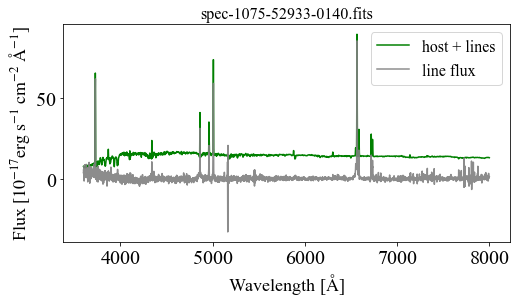

In [55]:
## Notes: `q1.masked_host` is not implemented in the online materials.
## Only for demonstration here
plt.figure(figsize=(8,4))
plt.plot(q1.wave, q1.host, c='g',label='host + lines')
#plt.plot(q1.wave, q1.masked_host, 'r-', label='masked host')
plt.plot(q1.wave, q1.line_flux, c='grey', alpha=0.9, label='line flux')
plt.legend()
plt.title(sp1.basename)
plt.xlabel(r'Wavelength [$\mathrm{\AA}$]');
plt.ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]');


In [62]:
for i,j,k in zip(q1.wave, q1.flux,q1.err):
    if i>5100-1 and i <5101:
        print(i,j,k)

5099.165589710808 -1.41552449170997 0.9846253019487291
5100.33879439476 -1.041504729480561 1.0077236992562362


In [59]:
q1.flux

array([ 5.28012522,  3.26045443,  4.07759132, ..., -2.79869334,
       -1.70663668, -1.81601523])

## MWA

In [8]:
gleam_data_dir='/Users/lyubing/Downloads/PS16dtm/gleamdata/'

In [13]:
os.listdir(gleam_data_dir)

['gleam_cutout_103-134MHz_29.5197916666667_-0.872744444444444.fits',
 'gleam_cutout_139-170MHz_29.5197916666667_-0.872744444444444.fits',
 'gleam_cutout_072-103MHz_29.5197916666667_-0.872744444444444.fits',
 'gleam_cutout_170-231MHz_29.5197916666667_-0.872744444444444.fits']

In [21]:
import aplpy

In [27]:
ra=29.519793   
dec=-0.872746
regfile=os.path.join(gleam_data_dir,'src.reg')

### def plot

#### def plot_gleamimage_dddd

In [69]:
def plot_gleamimage2_dddd(fits_image_filename,regfile,ra=ra,dec=dec,name='PS16dtm',regionsize=1.5):
    hdul_gleam_image=fits.open(fits_image_filename)
    hdul_gleam_image[0].data *=1e3                                 
    
    fig0 = plt.figure(figsize=(5, 5))
    fig = aplpy.FITSFigure(hdul_gleam_image,figure=fig0, subplot=[0.,0.0,1.0,1.0],)#slices=['x','y',0,0],
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2

    #fig.add_scalebar(0.2)
    #fig.scalebar.show(0.2)  # length in degrees

    #fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

    fig.show_regions(regfile)
    #fig.recenter(ra,dec, 2.0, 2.0)  # degrees
    #fig.show_regions('/home/brettlv/python_code/mwa/mwa_code_py/gleam_specfit/PKS 0736+01/PKS0736_src.reg')
    #fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    #fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)
   
    fig.ticks.set_color('black')
    fig.tick_labels.set_xformat('dd.dd')
    fig.tick_labels.set_yformat('dd.dd')

#fig.tick_labels.set_xformat('hh:mm')
#fig.tick_labels.set_yformat('dd:mm')
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees

#fig.ticks.set_minor_frequency(5.0)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')
    fig.colorbar.set_axis_label_font(size=14)
    fig.ticks.show()
#fig.axis_labels.set_xtext('Right Ascension (J2000)')
#fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')

    fig2=aplpy.FITSFigure(hdul_gleam_image, figure=fig0, subplot=[1.0,0.4,0.3,0.3])
    fig2.show_grayscale()
    fig2.show_colorscale(aspect='auto')#aspect='auto'
    # some code here with ax2
    fig2.recenter(ra,dec, 0.3, 0.3)  # degrees
    fig2.ticks.set_color('black')
    fig2.tick_labels.set_xformat('dd.dd')
    fig2.tick_labels.set_yformat('dd.dd')
    fig2.tick_labels.set_yposition('right')
    fig2.axis_labels.set_yposition('right')

    fig2.refresh()
    fig0.canvas.draw()
    #print('gleam_aplpy_%s.png'%(fits_image_filename.split('/')[-1]))
    save_png_path=fits_image_filename+'.png'
    fig.savefig(save_png_path,dpi=400)

In [46]:
def plot_gleamimage_dddd(fits_image_filename,regfile,ra=ra,dec=dec,name='PS16dtm',regionsize=1.5):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    fits_image_filename_hdu[0].data *= 1e3
    
    #hdul_gleam_image=fits.open(fits_image_filename)
    #hdul_gleam_image[0].data *=1e3

    #del fits_image_filename_hdu[0].header['*[34]']
    #fits_image_filename_hdu[0].header['NAXIS']=2
    #fits_image_filename_hdu[0].data = fits_image_filename_hdu[0].data[0][0]
        
    fig0 = plt.figure(figsize=(5, 5))
    fig = aplpy.FITSFigure(fits_image_filename_hdu,figure=fig0, subplot=[0.,0.0,1.0,1.0],)#slices=['x','y',0,0],
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2
    
    
    fig.add_scalebar(length=1.0)
    fig.scalebar.show(1.0)  # length in degrees    
    fig.scalebar.set_corner('top right')
    fig.scalebar.set_color('white')
    fig.scalebar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    fig.scalebar.set_linestyle('solid')
    fig.scalebar.set_linewidth(3)  # points
    fig.scalebar.set_label('1 degree')    
    
    
    fig.ticks.show()
    fig.ticks.set_color('black')
    fig.tick_labels.set_xformat('dd.dd')
    fig.tick_labels.set_yformat('dd.dd')
    #fig.tick_labels.set_xformat('hh:mm:ss')
    ##fig.tick_labels.set_yformat('dd:mm:ss')

    fig.show_regions(regfile)
    #fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    #fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)
    
#fig.add_scalebar(0.2)
#fig.scalebar.show(0.2)  # length in degrees
#fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

#fig.show_circles(33.23, 55.33, radius=0.3,)#x_world, y_world, radius
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees    

    fig.ticks.set_minor_frequency(5)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')
    fig.colorbar.set_axis_label_font(size=14)
    #fig.axis_labels.set_xtext('Right Ascension (J2000)')
    #fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')
    fig.refresh()
    #fig.set_auto_refresh(True)

    fig0.canvas.draw()
    #fig.savefig('mwa_aplpy_%s.png'%(fits_image_filename.split('/')[-1],), dpi=400,)  
    fits_image_filename_hdu.close()
    return fig

In [28]:
def plot_image_dddd(fits_image_filename,regfile,ra=ra,dec=dec,name='PS16dtm',regionsize=1.5):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    fits_image_filename_hdu[0].data *= 1e3

    del fits_image_filename_hdu[0].header['*[34]']
    fits_image_filename_hdu[0].header['NAXIS']=2
    fits_image_filename_hdu[0].data = fits_image_filename_hdu[0].data[0][0]
        
    fig_0 = plt.figure(figsize=(5, 5))
    fig = aplpy.FITSFigure(fits_image_filename_hdu,
                       figure=fig_0,
                       subplot=[0.,0.0,1.0,1.0])
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2
    
    
    fig.add_scalebar(length=1.0)
    fig.scalebar.show(1.0)  # length in degrees    
    fig.scalebar.set_corner('top right')
    fig.scalebar.set_color('white')
    fig.scalebar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    fig.scalebar.set_linestyle('solid')
    fig.scalebar.set_linewidth(3)  # points
    fig.scalebar.set_label('1 degree')    
    
    
    fig.ticks.show()
    fig.ticks.set_color('black')
    fig.tick_labels.set_xformat('dd.dd')
    fig.tick_labels.set_yformat('dd.dd')
    #fig.tick_labels.set_xformat('hh:mm:ss')
    ##fig.tick_labels.set_yformat('dd:mm:ss')

    fig.show_regions(regfile)
    fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    #fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)
    
#fig.add_scalebar(0.2)
#fig.scalebar.show(0.2)  # length in degrees
#fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

#fig.show_circles(33.23, 55.33, radius=0.3,)#x_world, y_world, radius
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees    

    fig.ticks.set_minor_frequency(5)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')
    fig.colorbar.set_axis_label_font(size=14)
    #fig.axis_labels.set_xtext('Right Ascension (J2000)')
    #fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')
    fig.refresh()
    #fig.set_auto_refresh(True)

    fig_0.canvas.draw()
    #fig.savefig('mwa_aplpy_%s.png'%(fits_image_filename.split('/')[-1],), dpi=400,)  
    fits_image_filename_hdu.close()
    return fig

def plot_image_hhmmss(fits_image_filename,regfile,ra=ra,dec=dec,name='PS16dtm',regionsize=1.5):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    fits_image_filename_hdu[0].data *= 1e3

    del fits_image_filename_hdu[0].header['*[34]']
    fits_image_filename_hdu[0].header['NAXIS']=2
    fits_image_filename_hdu[0].data = fits_image_filename_hdu[0].data[0][0]
        
    fig_0 = plt.figure(figsize=(5, 5))
    fig = aplpy.FITSFigure(fits_image_filename_hdu,
                       figure=fig_0,
                       subplot=[0.,0.0,1.0,1.0])
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2
    
    
    fig.add_scalebar(length=1.0)
    fig.scalebar.show(1.0)  # length in degrees    
    fig.scalebar.set_corner('top right')
    fig.scalebar.set_color('white')
    fig.scalebar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    fig.scalebar.set_linestyle('solid')
    fig.scalebar.set_linewidth(3)  # points
    fig.scalebar.set_label('1 degree')    
    
    
    fig.ticks.show()
    fig.ticks.set_color('black')
    #fig.tick_labels.set_xformat('dd.dd')
    #fig.tick_labels.set_yformat('dd.dd')
    fig.tick_labels.set_xformat('hh:mm:ss')
    fig.tick_labels.set_yformat('dd:mm:ss')

    fig.show_regions(regfile)
    fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    #fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)
    
#fig.add_scalebar(0.2)
#fig.scalebar.show(0.2)  # length in degrees
#fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

#fig.show_circles(33.23, 55.33, radius=0.3,)#x_world, y_world, radius
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees    

    fig.ticks.set_minor_frequency(5)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')
    fig.colorbar.set_axis_label_font(size=14)
    #fig.axis_labels.set_xtext('Right Ascension (J2000)')
    #fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')
    fig.refresh()
    #fig.set_auto_refresh(True)

    fig_0.canvas.draw()
    #fig.savefig('mwa_aplpy_%s.png'%(fits_image_filename.split('/')[-1],), dpi=400,)  
    fits_image_filename_hdu.close()
    return fig

def plot_image_recenter(fits_image_filename,regfile,ra=ra,dec=dec,name='PS16dtm',regionsize=1.5):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    fits_image_filename_hdu[0].data *= 1e3

    del fits_image_filename_hdu[0].header['*[34]']
    fits_image_filename_hdu[0].header['NAXIS']=2
    fits_image_filename_hdu[0].data = fits_image_filename_hdu[0].data[0][0]
        
    fig_0 = plt.figure(figsize=(5, 5))
    fig = aplpy.FITSFigure(fits_image_filename_hdu,
                       figure=fig_0,
                       subplot=[0.,0.0,1.0,1.0])
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2

    

    #fig.ticks.show()
    fig.ticks.set_color('black')
    fig.tick_labels.set_xformat('dd.dd')
    fig.tick_labels.set_yformat('dd.dd')
    fig.ticks.set_minor_frequency(5)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')

    
    fig.show_regions(regfile)
    fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)


    fig.recenter(ra,dec, regionsize, regionsize)  # degrees
    
#fig.add_scalebar(0.2)
#fig.scalebar.show(0.2)  # length in degrees
#fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

#fig.show_circles(33.23, 55.33, radius=0.3,)#x_world, y_world, radius
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees    

   
    fig.add_scalebar(length=0.2)
    fig.scalebar.show(0.2)  # length in degrees
    
    fig.scalebar.set_corner('top right')
    fig.scalebar.set_color('white')
    fig.scalebar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    fig.scalebar.set_linestyle('solid')
    fig.scalebar.set_linewidth(3)  # points
    fig.scalebar.set_label('12 arcmin')

    #fig.axis_labels.set_xtext('Right Ascension (J2000)')
    #fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')
    fig.refresh()
    #fig.set_auto_refresh(True)
#fig.recenter(201,-43,radius=1)  # degrees
    fig_0.canvas.draw()
    #fig.savefig('mwa_aplpy_%s.png'%(fits_image_filename.split('/')[-1],), dpi=400,)  
    fits_image_filename_hdu.close()
    return fig

In [32]:
def def_show_markers(fig,skymodeldata,color='yellow'):
    ras=skymodeldata['ra']
    decs=skymodeldata['dec']
    fig.show_markers(ras, decs, layer='marker_set_2', edgecolor=color,
                facecolor='none', marker='o', s=50, alpha=1.0)
    
def def_add_label_loc(fig,skymodeldata,color='blue'):
    ras=skymodeldata['ra']
    decs=skymodeldata['dec']
    for ra_,dec_ in zip(ras,decs):
    #print('%.3f,%.3f'%(ra_,dec_))
        fig.add_label(ra_,dec_,'%.3f,%.3f'%(ra_,dec_),color=color,fontsize=14)

def def_add_label_name(fig,skymodeldata,color='red'):
    ras=skymodeldata['ra']
    decs=skymodeldata['dec']
    names=skymodeldata['Name']
    for ra_,dec_,name_ in zip(ras,decs,names):
    #print('%.3f,%.3f'%(ra_,dec_))
        fig.add_label(ra_,dec_,name_,color=color,fontsize=14)        
        
        
def def_show_gleam_markers(fig,gleam_data,ralabel='RAJ2000',declabel='DEJ2000',color='yellow'):
    ras=gleam_data[ralabel]
    decs=gleam_data[declabel]
    fig.show_markers(ras, decs, layer='marker_set_2', edgecolor=color,
                facecolor='none', marker='o', s=50, alpha=1.0)

def def_add_gleam_label_loc(fig,skymodeldata,ralabel='RAJ2000',declabel='DEJ2000',color='blue'):
    ras=skymodeldata[ralabel]
    decs=skymodeldata[declabel]
    for ra_,dec_ in zip(ras,decs):
    #print('%.3f,%.3f'%(ra_,dec_))
        fig.add_label(ra_,dec_,'%.3f,%.3f'%(ra_,dec_),color=color,fontsize=14)

def def_add_gleam_label_name(fig,skymodeldata,ralabel='RAJ2000',declabel='DEJ2000',namelabel='Name',color='red'):
    ras=skymodeldata[ralabel]
    decs=skymodeldata[declabel]
    names=skymodeldata[namelabel]
    for ra_,dec_,name_ in zip(ras,decs,names):
    #print('%.3f,%.3f'%(ra_,dec_))
        fig.add_label(ra_,dec_,name_,color=color,fontsize=14)        
        

### plot

INFO: Auto-setting vmin to -2.228e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.244e+03 [aplpy.core]
INFO: Auto-setting vmin to -2.323e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.336e+03 [aplpy.core]


INFO: Auto-setting vmin to -2.275e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.277e+03 [aplpy.core]
INFO: Auto-setting vmin to -2.445e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.485e+03 [aplpy.core]


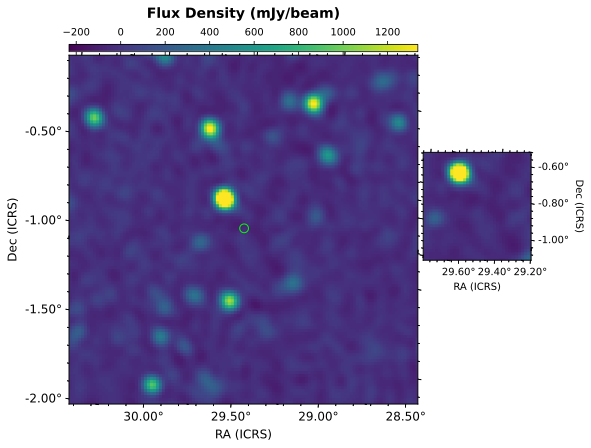

In [70]:
infile=os.path.join(gleam_data_dir,'gleam_cutout_072-103MHz_29.5197916666667_-0.872744444444444.fits')
outfile=infile[:-5]
#(infile,outfile)
fits_image_filename=infile
fig=plot_gleamimage2_dddd(fits_image_filename,regfile,ra=ra,dec=dec,name='PS16dtm',regionsize=1.5)

INFO: Auto-setting vmin to -2.380e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.373e+03 [aplpy.core]
INFO: Auto-setting vmin to -2.360e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.323e+03 [aplpy.core]


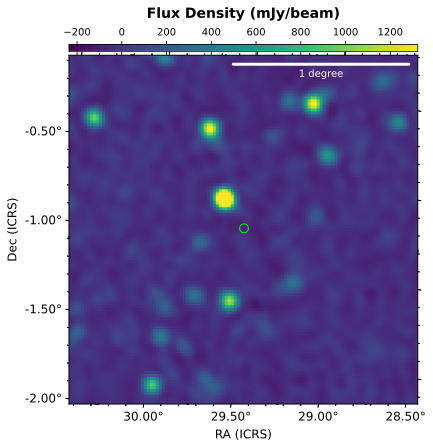

In [47]:
infile=os.path.join(gleam_data_dir,'gleam_cutout_072-103MHz_29.5197916666667_-0.872744444444444.fits')
outfile=infile[:-5]
#(infile,outfile)
fits_image_filename=infile
fig=plot_gleamimage_dddd(fits_image_filename,regfile,ra=ra,dec=dec,name='PS16dtm',regionsize=1.5)

In [2]:
pwd

'/Users/lyubing/blog/brettlv.github.io/pythoncode/astro_source_analysis'

## ASKAP

In [1]:
import numpy as np
import pandas as pd
import os
from astropy.table import Table

In [3]:
ASKAP_PS16dtm=Table.read('/Users/lyubing/Downloads/PS16dtm/sb33699/catalogues/selavy-image.i.VAST_0208+00.SB33699.cont.taylor.0.restored.conv.components.xml')

In [6]:
ra=29.519793   
dec=-0.872746

In [7]:
radec_select=np.logical_and(abs(ASKAP_PS16dtm['col_ra_deg_cont']-ra)<0.1,abs(ASKAP_PS16dtm['col_dec_deg_cont']-dec)<0.1)

ASKAP_PS16dtm[radec_select]

col_island_id,col_component_id,col_component_name,col_ra_hms_cont,col_dec_dms_cont,col_ra_deg_cont,col_dec_deg_cont,col_ra_err,col_dec_err,col_freq,col_flux_peak,col_flux_peak_err,col_flux_int,col_flux_int_err,col_maj_axis,col_min_axis,col_pos_ang,col_maj_axis_err,col_min_axis_err,col_pos_ang_err,col_maj_axis_deconv,col_min_axis_deconv,col_pos_ang_deconv,col_maj_axis_deconv_err,col_min_axis_deconv_err,col_pos_ang_deconv_err,col_chi_squared_fit,col_rms_fit_gauss,col_spectral_index,col_spectral_curvature,col_spectral_index_err,col_spectral_curvature_err,col_rms_image,col_has_siblings,col_fit_is_estimate,col_spectral_index_from_TT,col_flag_c4,col_comment
--,--,,,,deg,deg,arcsec,arcsec,MHz,mJy/beam,mJy/beam,mJy,mJy,arcsec,arcsec,deg,arcsec,arcsec,deg,arcsec,arcsec,deg,arcsec,arcsec,deg,--,mJy/beam,--,--,--,--,mJy/beam,,,,,
str20,str24,str26,str12,str13,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,str100
SB33699_island_1493,SB33699_component_1493a,J015743-005516,01:57:43.1,-00:55:16,29.429394,-0.921231,0.42,0.34,1367.5,2.676,0.264,3.226,0.518,10.22,8.14,90.15,0.99,0.81,0.31,4.58,2.96,-74.55,5.06,14.87,28.90,0.887,184.699,-99.00,-99.00,0.00,0.00,0.335,0,0,1,0,


In [51]:
name='PS16dtm'
D_cm_PS16dtm= cosmo.luminosity_distance(z=0.0804).to(u.cm) 

In [58]:
L_nu= 4*np.pi*D_cm_PS16dtm.value**2*0.75*1e-3*1e-23#mJy
nuL_nu=887.5*1e6*L_nu

In [59]:
nuL_nu

1.0620820621419484e+38